### Udacity Project - Investigate a dataset
#### Jean Paul Barddal

#### Project Description

* **Dataset chosen:** Titanic
* **Question to be answered:** What factors made people more likely to survive?

The latter question will be analyzed via other (more detailed questions), such as:
1. The gender has any impact in the survival rates?
2. What about the embarkation port?
3. And the passenger class? Does the 1st class present higher survival rates?

and so on...

#### Loading data

In [166]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./titanic.csv")
df.drop('PassengerId', axis = 1, inplace = True)
display(df.head())
display(df.shape)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 11)

#### Brief description of the variables
* Survived: (0 = No; 1 = Yes)
* Pclass: Passenger class (1: first class, 2: second class, 3: 3rd class)
* Name: name of the passenger
* Sex: sex of the passenger
* Age: age of the passenger
* SibSp: # of siblings or spouses aboard
* Parch: # of parents or children aboard
* Ticket: ticket number
* Fare: passenger fare
* Cabin: cabin of the passenger
* Embarked: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Looking at the data

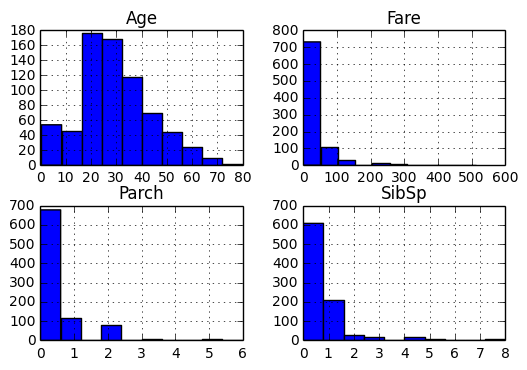

In [167]:
plot = df.hist(column=['Age', 'SibSp', 'Parch', 'Fare'])

#### Before we start... Deal with missing data!

In [168]:
df.isnull().sum()
#for att in df.columns.values:
#    nMissing = df[att].isnull().sum()
#    print "- {} has {} missing".format(att, nMissing)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Note: ** I don't want to work with the cabin or the embarked attributes, and thus, I will not impute data for them.

#### Adding some descriptive labels

In [169]:
# Create Survival Label Column
df['Survival'] = df.Survived.map({0 : 'Died', 1 : 'Survived'})
# Create Pclass Label Column
df['Class'] = df.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
# Create Embarked Labels Column
df['Ports'] = df.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})

#### Highly biased attributes: _Both name, ticket and cabin may lead our future models to overfit, so I'll drop both_

In [170]:
df.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

##### Handling Age

In [171]:
ages = df.loc[df['Age'].notnull()]
avgAges = ages.mean()['Age'] 
# print avgAges
df['Age'].fillna(avgAges, inplace = True)
# display(df)


#### Question 1 - What is the survival rate of women? and the rate for men?

We had 577 men and 314 women in the Titanic (total = 891).
109 men survived (ratio = 18.89%)
233 women survived (ratio = 74.20%)


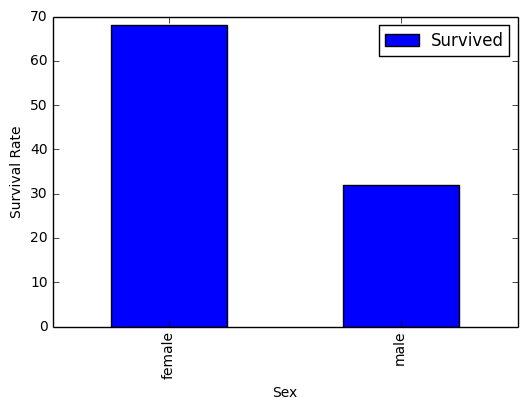

In [172]:
nPassengers = df.shape[0]
nMen        = df.loc[df['Sex'] == "male"].shape[0]
nWomen      = nPassengers - nMen

print "We had {} men and {} women in the Titanic (total = {}).".format(nMen, nWomen, nPassengers)


### finding the number of men that survived
maskMen = (df['Sex'] == "male") & (df['Survived'] == 1)
nMenSurvived = df.loc[maskMen].shape[0]
ratioMen = 100 * (nMenSurvived / float(nMen))

print "{} men survived (ratio = {:.2f}%)".format(nMenSurvived, ratioMen)

### finding the number of women that survived
maskWomen = (df['Sex'] == "female") & (df['Survived'] == 1)
nWomenSurvived = df.loc[maskWomen].shape[0]
ratioWomen = 100 * (nWomenSurvived / float(nWomen))

print "{} women survived (ratio = {:.2f}%)".format(nWomenSurvived, ratioWomen)


dfMenWomenRatio = df.groupby('Sex').sum().reset_index()
# display(dfMenWomenRatio)
dfMenWomenRatio['Survived'] = dfMenWomenRatio['Survived'].apply(lambda x: 100 * float(x) / (dfMenWomenRatio['Survived'].sum()))
# display(dfMenWomenRatio)
plot = dfMenWomenRatio.plot(kind="bar", x='Sex', y='Survived')
plot.set_ylabel("Survival Rate") 

**Note: ** Whoa, we have quite a difference here: almost 75% of the women survived, while only 19% of the men survived.

#### Question 2 - The embarkation port has any impact in the survival rates?

In [173]:
display(df.groupby(['Ports'])['Survived'].value_counts())
df_embarkedNorm = df.groupby(['Ports'])['Survived'].value_counts(normalize = True)
display(df_embarkedNorm)

# ports = ["C", "Q", "S"]
# for port in ports:
#     maskPort         = (df['Embarked'] == port)
#     maskPortSurvived = (df['Embarked'] == port) & (df['Survived'] == 1)
#     nPort            = df.loc[maskPort].shape[0]
#     nPortSurvived    = df.loc[maskPortSurvived].shape[0]
#     ratio            = 100 * (nPortSurvived / float(nPort))
#     print "Port {}: {} out of {} survived (ratio = {}%)".format(port, nPortSurvived, nPort, ratio)

Ports        Survived
Cherbourg    1            93
             0            75
Queenstown   0            47
             1            30
Southampton  0           427
             1           217
Name: Survived, dtype: int64

Ports        Survived
Cherbourg    1           0.553571
             0           0.446429
Queenstown   0           0.610390
             1           0.389610
Southampton  0           0.663043
             1           0.336957
Name: Survived, dtype: float64

** Note: ** Again, we have something interesting here. For some reason, passengers that embarked at the port of Cherbourg had a survival rate of 55%, while the remaining passenger had survival rates below 38%. (I'm thinking maybe people that embarked in this port belong to the 1st class, or maybe they are mostly women?)

In [174]:
display(df[df.Embarked=='C'].groupby(['Embarked', 'Pclass', 'Sex'])['Survived'].value_counts())

display(df[(df.Embarked=='C') & (df.Sex == "female")].groupby(['Embarked', 'Pclass'])['Survived'].value_counts(normalize = True))

# ### Cherbourg
# maskCherbourg = df['Embarked'] == "C"
# nCherbourg = df.loc[maskCherbourg].shape[0]

# #### Cherbourg and Classes
# print "PCLASS"
# for pClass in range(1, 4):
#     maskCherbourgClass  = (df['Embarked'] == "C") & (df['Pclass'] == pClass)
#     maskCherbourgClassSurvived  = (df['Embarked'] == "C") & (df['Pclass'] == pClass) & (df['Survived'] == 1)
#     nCherbourgClass     = df[maskCherbourgClass].shape[0]
#     nSurvivedCherbourg  = df[maskCherbourgClassSurvived].shape[0]
#     ratio = 100 * (nSurvivedCherbourg / float(nCherbourgClass))
#     print "- {} passengers in the class #{} w/ a survival rate of {:.2f}%".format(nCherbourgClass, pClass, ratio)

# print "\n WOMEN"
# #### Cherbourg and Women
# maskCherbourgWomen = (df['Embarked'] == "C") & (df['Sex'] == "female")
# nWomenCherbourg    = df.loc[maskCherbourgWomen].shape[0]
# ratio = 100 * (nWomenCherbourg / float(nCherbourg))
# print "- {} (ratio = {}) women embarked in Cherbourg (total passengers = {})".format(nWomenCherbourg, ratio, nCherbourg)

Embarked  Pclass  Sex     Survived
C         1       female  1           42
                          0            1
                  male    0           25
                          1           17
          2       female  1            7
                  male    0            8
                          1            2
          3       female  1           15
                          0            8
                  male    0           33
                          1           10
Name: Survived, dtype: int64

Embarked  Pclass  Survived
C         1       1           0.976744
                  0           0.023256
          2       1           1.000000
          3       1           0.652174
                  0           0.347826
Name: Survived, dtype: float64

In [175]:
display(df[(df.Embarked == "C") & (df.Sex == "female")].groupby('Pclass')['Survived'].value_counts())
display(df[(df.Embarked == "C") & (df.Sex == "female")].groupby('Pclass')['Survived'].value_counts(normalize = True))

### How many women we have in each class that embarked at Cherbourg? And how many survived?

# maskWomenInCherbourg         = (df['Embarked'] == "C") & (df['Sex'] == "female")
# maskWomenInCherbourgSurvived = (df['Embarked'] == "C") & (df['Sex'] == "female") & (df['Survived'] == 1)

# print "PCLASS"
# for pClass in range(1, 4):
#     nWomenCherbourg         = df.loc[maskWomenInCherbourg & (df['Pclass'] == pClass)].shape[0]
#     nWomenCherbourgSurvived = df.loc[maskWomenInCherbourgSurvived & (df['Pclass'] == pClass)].shape[0]
#     print "{} women in the class #{}, and {} survived".format(nWomenCherbourg, pClass, nWomenCherbourgSurvived)

Pclass  Survived
1       1           42
        0            1
2       1            7
3       1           15
        0            8
Name: Survived, dtype: int64

Pclass  Survived
1       1           0.976744
        0           0.023256
2       1           1.000000
3       1           0.652174
        0           0.347826
Name: Survived, dtype: float64

**Note: ** Now we have something interesting! From the 43 women in the 1st class, only 1 died! And from those in the 2nd class, all survived! Unfortunately, the women in the 3rd class were not so lucky, since only 15 of the 23 survived.

#### Question 4 - What are the survival rates for each passenger class?

In [176]:
display(df.groupby(['Pclass'])['Survived'].value_counts())
display(df.groupby(['Pclass'])['Survived'].value_counts(normalize = True))

# print "PCLASS"
# for pClass in range(1, 4):
#     maskClass = (df['Pclass'] == pClass)
#     maskClassSurvived = maskClass & (df['Survived'] == 1)
#     nClass = df.loc[maskClass].shape[0]
#     nClassSurvived = df.loc[maskClassSurvived].shape[0]
#     ratio = 100 * (nClassSurvived / float(nClass))
#     print "{} people in the class #{}, and {} survived \t (ratio = {:.2f})".format(nClass, pClass, nClassSurvived, ratio)

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

**Note: ** Here we have another simple but revealing set of statistics. From the 236 people in the 1st class, approx. 63% survived, which is fairly greater amount when compared to the rates of 47% and 24% from the 2nd and 3rd classes, respectively. With these numbers, it becomes clear that wealthier people were favored during the emergency procedures, or that they were closer to the rescue boats.

#### Going automatic: Learning a decision tree

The previous questions were tackled using simple filters (queries) and rates, which already allowed us to verify how important some variables are important to predict who survived the Titanic tragedy. This dataset is commonly used during the teaching of supervised learning techniques, and instead of verifying variables and the combinations of variables, we could now try to automatize our work, using a decision tree. A decision tree is a classification algorithm that *learns* which attributes are important on the go (embedded feature selection), but more importantly, produces a legible model that allows humans to understand important underlying phenomena of the dataset. Below I present a very simple decision tree (with a depth of 3 - I could build a deeper tree here, but I'm trying to keep it simple and readable), that shows some important things about the titanic dataset.

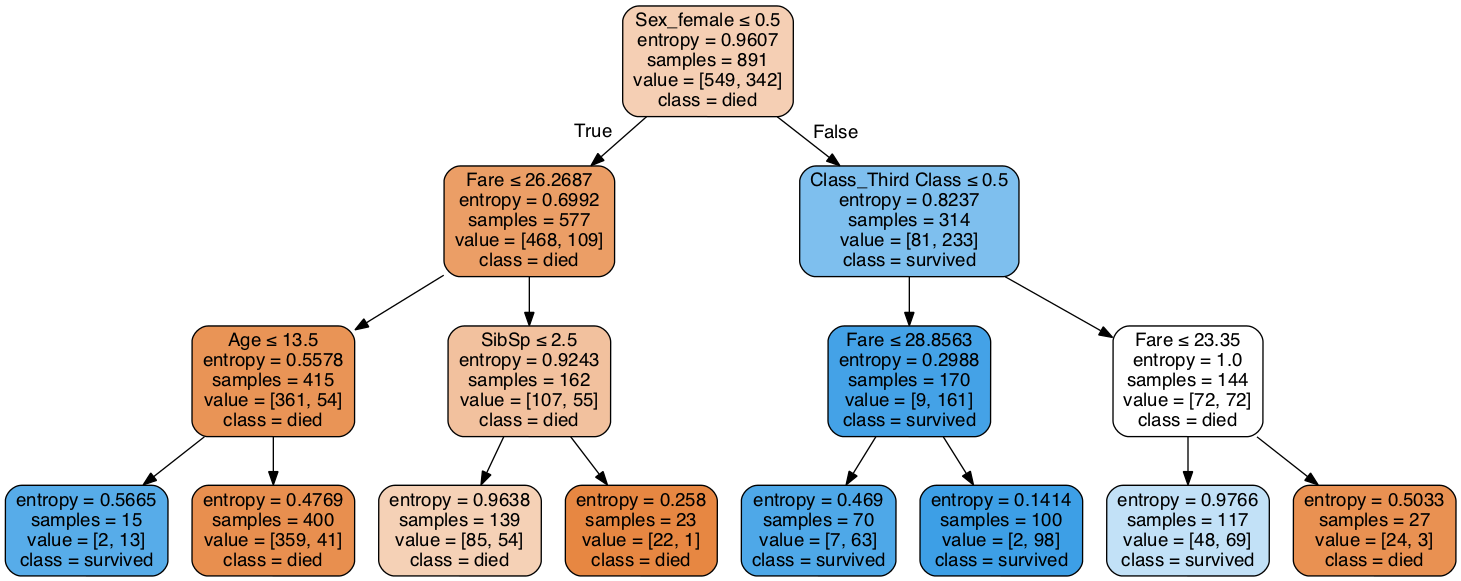

In [177]:
X = df.drop(['Survived', 'Survival'], axis = 1)
Y = df['Survived']

#### converting categorical attributes into dummies
toRemove = []
for att in X.columns.values:
    if X[att].dtype == object:
        dummies = pd.get_dummies(X[att], prefix = att)
        X = X.join(dummies)
        toRemove.append(att)

for att in toRemove:
    X.drop(att, axis = 1, inplace = True)

from sklearn      import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
dt.fit(X,Y)

import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=X.columns.values,
                         class_names=["died", "survived"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

If we observe the first node of the tree, we have a very simple question: are we dealing with a man? If so, we would traverse to the left. At this point, the following questions would be regarding the fare that this man paid and his age (always going left): if he paid less than 26.26, and his age was also below 13.5, he would survive with a 86% chance (13 out of 15). If we repeat the same process for all branches, we would see that all the "right" sub-tree, which is devoted to women, would result in survival rates. The main reasons for that are simple: (i) as we saw earlier, compared to men, women were more likely to survive, and (ii) this tree is not complete, so we don't have any branches that will specify the cases where women died. We could apply the same rationale to evaluate the "left" sub-tree (devoted to men), where we'll see that most of the predictions are to men dying.

#### Conclusion

Although simple and widely used, the Titanic dataset is able to help us to understand a lot of cool concepts on data analysis. During my analysis, I've checked the survival rates obtained for men, women, embarkation port, passenger class, but also some combinations, such as the survival rates of those who embarked at a specific port and that also were women, and so on. Finally, I've shown how we could automatize our analysis process by using a decision tree. The best things about decision trees are that they are (i) easy to use, (ii) fast, but more importantly, (iii) easy to read. Legibility is of the utmost importance since we usually need to explain our rationale to laymen, and decision trees can help us with that!